# Introduction : 

Dans cet exemple , on va étudier un algorithme de machine learning qui est utilisé fréquemment dans la data science qui l'algorithme de "Decision_Trees".
Decision_Trees est un algorithme utilisé dans la classification.En fait , il permet de créer un model à partir des données historiques des patients, et de leur réponse aux différents médicaments.Ensuite,on va utiliser l'arbre de décision formée pour prédire la classe d'un patient inconnu, ou pour trouver un médicament approprié pour un nouveau patient.

Le nom du data set est drug.csv.



### Importer les modules nécessaires

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier


###  A propos du dataset 


Imaginez que vous êtes un chercheur médical qui compile des données pour une étude. Vous avez recueilli des données sur un ensemble de patients, tous atteints de la même maladie. Au cours de leur traitement, chaque patient a répondu à l'un des cinq médicaments suivants : drug A, drug B, drugt c, drug x et le médicament y.

Une partie de votre travail consiste à construire un modèle afin de déterminer quel médicament pourrait convenir à un futur patient souffrant de la même maladie. Les caractéristiques de cet ensemble de données sont l'âge, le sexe, la tension artérielle et le cholestérol des patients, et la cible est le médicament auquel chaque patient a répondu.


In [15]:
#importer la dataframe 
my_data = pd.read_csv("drug.csv", delimiter=",")
#Affichage des  premiers lignes 
my_data[0:5]
# Ou bien 
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [16]:
#affichage la taille du data et sa forme(nombre de lignes (observations) et nombre de colonnes(features))
print(my_data.size)
print(my_data.shape)
#On constate qu'on a 200 observations et 6 colonnes qui sont Age,Sex,BP,Cholesterol,Na_to_K et Drug

1200
(200, 6)


### Etape de preprocessing 


In [20]:
#Dans cette partie on va créer un Vecteur numpy contenant les colonnes(features) qu'on va les utiliser pour construire 
#notre model : 
X=my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
print(type(X))
X[0:5]


<class 'numpy.ndarray'>


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Certains features du dataframe sont de nature catégoriel , comme le sexe ou BP. Malheureusement, les arbres de décision ne gèrent pas les variables catégorielles. Mais on peut tout de même convertir ces caractéristiques en valeurs numériques. pandas.get_dummies() Convertir la variable catégorielle en variables dummy/indicator .

In [21]:
from sklearn import preprocessing
#importer la fonction LabelEncoder de sklearn pour appliquer la conversion catégorie/numérique 
#ici on a appliquer la valeur 0 pour 'F' et 1 pour 'M'
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 

# la valeur 0 pour "LOW",1 pour "NORMAL" et 2 pour "HIGH"
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])

# la valeur 0 pour "NORMAL" et  pour "HIGH"
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [34]:
# Le résultat de l'affichage est parait puisque la data frame contient seulement des variables numériques.
#Maintenant on va extraire le variable à prédire : 
y=my_data["Drug"]

In [35]:
y[0:5]


0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [36]:
print(type(y))

<class 'pandas.core.series.Series'>


### Mise en place "Decision tree"

In [40]:
from sklearn.model_selection import train_test_split
#On va divider la data frame en deux partie : une partie pour "le training" et l'autre pour "le testing" 
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
# your code
print(my_data.shape)
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)
#On constate ici qu'on prend 70% du données pour faire "le training" des données et 30% pour faire "le testing"
#et ceci se manifeste par la taille du X_traintest et y_trainset est et également par la taille du X_testset et y_testset


(200, 6)
(140, 5)
(140,)
(60, 5)
(60,)


### Construire le model 

In [66]:
#créer une instance du DecisionTreeClassifier
drug_Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # on a fixer le max_depth à 4 pour éviter
#les phénomènes de underfitting et overfitting. 
drug_Tree_model # Affichage des paramétres de default de ce model 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
#Etape de training
drug_Tree_model.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
#Etape de predicting 
prediction=drug_Tree_model.predict(X_testset)
print(prediction[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


### Etape d'Evaluation 


In [69]:
from sklearn import metrics 
print("La précision du model : ", metrics.accuracy_score(y_testset, prediction))

La précision du model :  0.9833333333333333


In [70]:
#Ce model est de 98.33333 % de précision et il est un trés bon estimateur et un trés bon également prédicteur 
#On constate que l'erreur est trés petit equivau à 1-0.98333 = 0.01667 = 1.667%  

In [72]:
## si on prend le max_depth = 2 on va voir la différence obtenue : 
drug_Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 2) 
drug_Tree_model.fit(X_trainset,y_trainset)
prediction=drug_Tree_model.predict(X_testset)
print("La précision du model : ", metrics.accuracy_score(y_testset, prediction))

La précision du model :  0.8166666666666667


In [73]:
#certe , la précision diminue car on a diminuer du valeur de max_depth et l'erreur augment alors le chaoix du maxx_depth est
#trés important dans notre algorithme de decision tree et on peut faire plusierus tests pour atteindre le valeur du max_depth
#qui nous donne une trés bonne précision.


### Visualisation 

In [80]:
Y_target=my_data['Drug']
X_features=my_data.drop(['Drug'],axis=1)
print(type(X_features))
names=list(X_features.columns.values)

<class 'pandas.core.frame.DataFrame'>


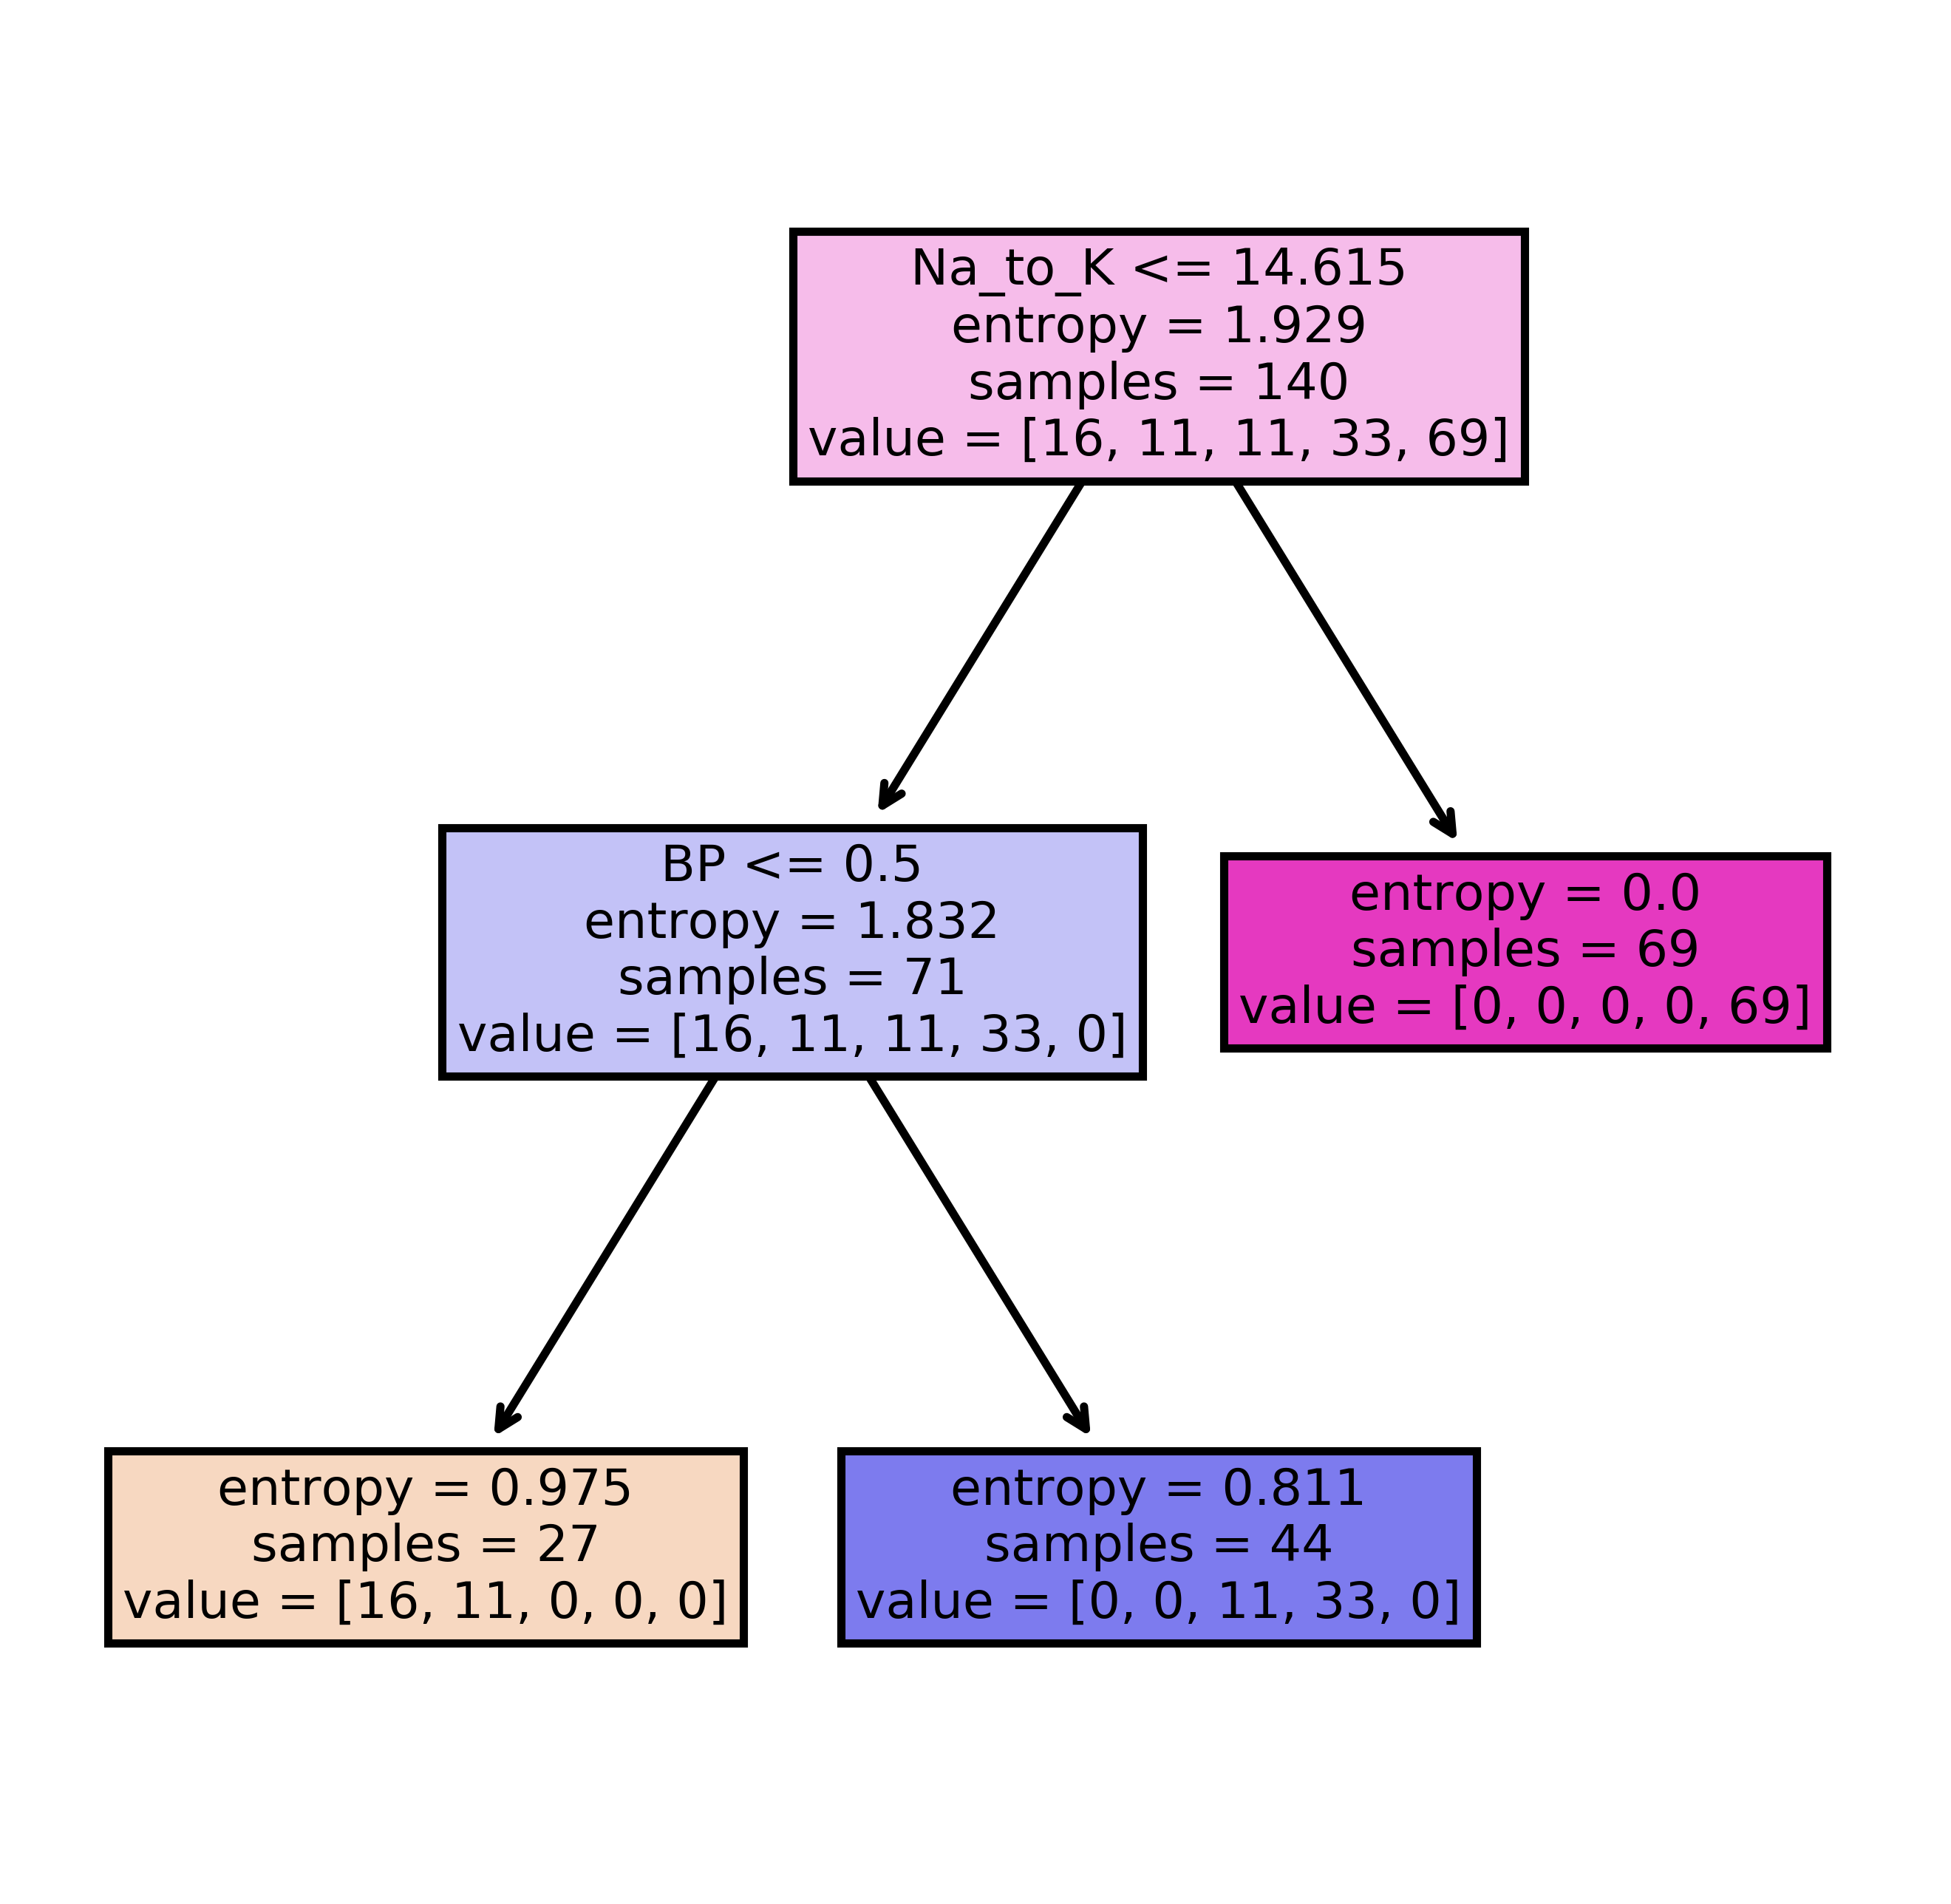

In [82]:
from sklearn import tree

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(drug_Tree_model,
               feature_names = names,
              # class_names=cn,
               filled = True)

fig.savefig('Tree_photo_Drug.jpg')

### L'importance des différents features 


In [85]:
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [101]:
X_train=my_data[['Age','Sex','BP','Cholesterol','Na_to_K']]
print(type(X_train))
print(X_train)
X_train.shape[1]

<class 'pandas.core.frame.DataFrame'>
     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]


5

In [91]:
importances=drug_Tree_model.feature_importances_
print(importances*100)
print()
print()
for f in range(X_train.shape[1]):
    print((names[f],  importances[[f]]*100))

[ 0.          0.         32.70690163  0.         67.29309837]


('Age', array([0.]))
('Sex', array([0.]))
('BP', array([32.70690163]))
('Cholesterol', array([0.]))
('Na_to_K', array([67.29309837]))


In [92]:
#On voit ici l'importance de chaque feature du data frame en pourcentage , on remarque que la colonne Age , Sex et Cholesterol 
#n'ont pas de grande importance car la valeur correspondante est égale à 0 alors que le meilleure feautre est la colonne Na_to_K.
